In [4]:
import csv
import numpy as np
temp_dict = {}
for i in range(1750,2016,1):
    temp_dict[i] = ['']*12

filename = "GlobalTemperatures.csv"
rows = []
with open(filename, 'r') as csvfile:

    csvreader = csv.reader(csvfile)
    fields = next(csvreader)
 
    for row in csvreader:
        year, month = int(row[0][:4]), int(row[0][5:7])
        if row[1] != "":
            temp_dict[year][month-1] = float(row[1])   

In [5]:
print(len(temp_dict.keys()))
for i in range(1750,2016,1):
    if '' in temp_dict[i] or i < 1830:
        del temp_dict[i]
print(len(temp_dict.keys()))

266
186


In [ ]:
temp_dict

In [6]:
months = {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[]}
for i in temp_dict.keys():
    for j in range(0,12,1):
        months[j].append(temp_dict[i][j])
months_avg = []
for i in months.keys():
    months_avg.append(np.average(months[i]))

In [7]:
months_avg

[2.476784946236559,
 3.0404623655913983,
 5.091295698924731,
 8.259682795698925,
 11.159010752688172,
 13.350397849462366,
 14.343752688172044,
 13.77197311827957,
 11.884204301075268,
 9.22374193548387,
 5.887317204301076,
 3.449489247311828]

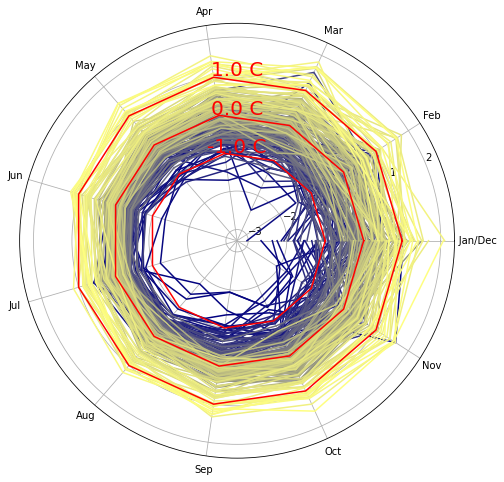

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot(111, projection='polar')
lines, labels = plt.thetagrids((0, 1*(360/11), 2*(360/11),3*(360/11),4*(360/11),5*(360/11),6*(360/11),7*(360/11),8*(360/11),9*(360/11),10*(360/11)), labels=('      Jan/Dec', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov'))

for num,i in enumerate(temp_dict.keys()):
    r = np.asarray(temp_dict[i].copy()) - months_avg
    r = list(r)
    theta = np.linspace(0, 2*np.pi, 12)
    ax1.plot(theta, r, c=[num/len(temp_dict.keys()),num/len(temp_dict.keys()),0.5])
ax1.plot(theta, [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1], c=[1,0,0])
ax1.plot(theta, [0,0,0,0,0,0,0,0,0,0,0,0], c=[1,0,0])
ax1.plot(theta, [1,1,1,1,1,1,1,1,1,1,1,1], c=[1,0,0])
ax1.text(np.pi/2, -1, "-1.0 C", color="red", ha='center', fontdict={'fontsize': 20})
ax1.text(np.pi/2, 0, "0.0 C", color="red", ha='center', fontdict={'fontsize': 20})
ax1.text(np.pi/2, 1, "1.0 C", color="red", ha='center', fontdict={'fontsize': 20})
plt.show()

In [9]:
import csv
import numpy as np
temp_dict = {}
for i in range(1990,2015,1):
    temp_dict[i] = {}

country_list = ['Germany','European Union','Russian Federation','Turkey','United States of America','United Kingdom','Canada','Italy','Japan','Poland']
c_list = {}
for i in country_list:
    c_list[i] = []

filename = "greenhouse_gas_inventory_data_data.csv"
rows = []
with open(filename, 'r') as csvfile:

    csvreader = csv.reader(csvfile)
    fields = next(csvreader)
 
    for row in csvreader:
        #print(row)
        #year, month = int(row[0][:4]), int(row[0][5:7])
        if 'carbon_dioxide_co2' in row[3] and row[0] in country_list:
            temp_dict[int(row[1])][row[0]] = int(float(row[2]))   
            c_list[row[0]].append(int(float(row[2])))

[895992, 4124878, 1706496, 250573, 5664364, 545820, 541032, 443153, 1247795, 339273]


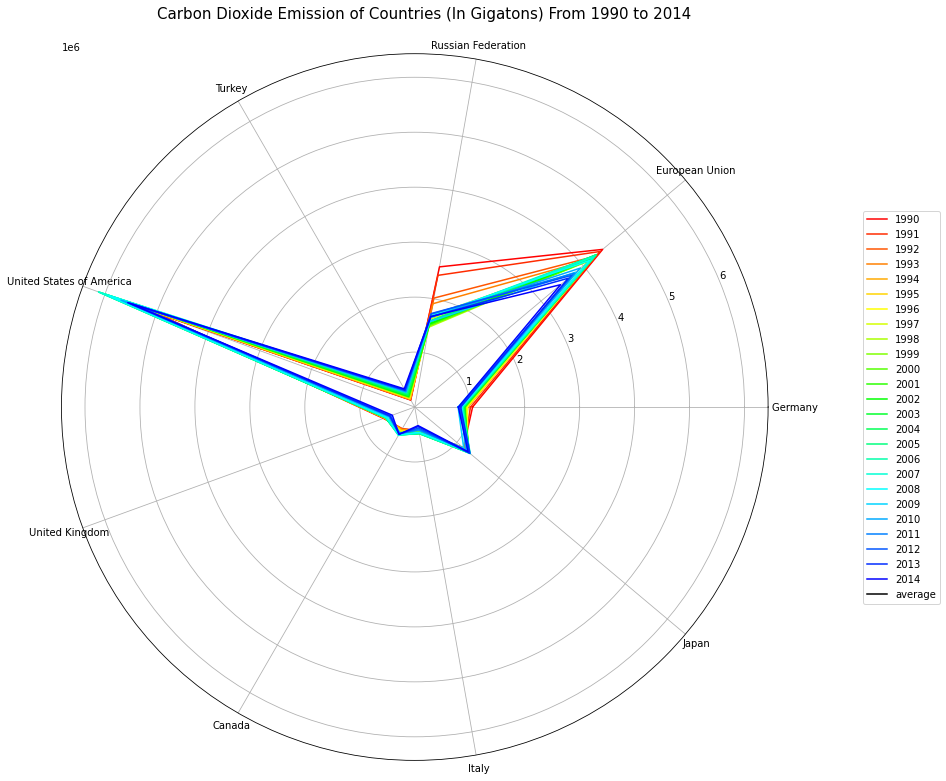

In [42]:
from colour import Color
avg = []
for num,i in enumerate(c_list.keys()):
    keys = c_list[i]
    avg.append(int(np.average(np.asarray(keys))))

red = Color("red")
colors = list(red.range_to(Color("blue"),25))
import matplotlib.pyplot as plt
print(avg)
fig = plt.figure(2,figsize=(13,13))
ax1 = plt.subplot(111, projection='polar')
ax1.set_title("    Carbon Dioxide Emission Change of Countries According to Their Average (In Kilotons) From 1990 to 2014", color='Black', fontdict={'fontsize': 20},pad= 35)
lines, labels = plt.thetagrids((0, 1*(360/9), 2*(360/9),3*(360/9),4*(360/9),5*(360/9),6*(360/9),7*(360/9),8*(360/9)), labels=('        Germany','European Union','Russian Federation','Turkey','United States of America','United Kingdom','Canada','Italy','Japan'))
for num,i in enumerate(temp_dict.keys()):
    ctries = temp_dict[i]
    r = []
    for j in country_list:
        r.append(ctries[j])
    r[-1] = r[0]
    avg[-1] = avg[0]
    
    #print(r)
    theta = np.linspace(0, 2*np.pi, 10)
    #print(np.asarray(r), np.asarray(r) -avg)
    ax1.plot(theta, np.asarray(r) - avg, color=colors[num].rgb, label = i)
    #print([num/len(temp_dict.keys()),num/len(temp_dict.keys()),0.5],colors[num])
ax1.plot(theta, [0,0,0,0,0,0,0,0,0,0], c=[0,0,0], label = 'average')
plt.legend(loc="right",bbox_to_anchor=(1.25,0.5))

In [14]:
!pip install colour